In [1]:
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.1'

# Read in Boston Graph

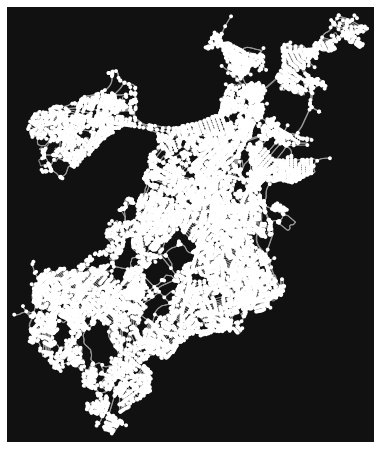

In [2]:
# get street graph for Boston city
G = ox.graph_from_place('Boston, USA', network_type='drive')
fig, ax = ox.plot_graph(G)

# OD matrix of Boston

In [3]:
# read the od matrix
Boston_OD=pd.read_csv(r'D:\Berkeley\CE263N\Project idea\4weixin\BostonMatrix.txt', delimiter=' ')
Boston_OD.head()

,id_25005600100,id_25005600202,id_25005600203,id_25005600204,id_25005610100,id_25005610202,id_25005610203,id_25005610204,id_25005611101,id_25005611102,...,id_25027747101,id_25027747102,id_25027748100,id_25027749100,id_25027749200,id_25027750100,id_25027750200,id_25027750300,id_25027761200,id_25027761400
id_osm_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id_osm_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id_osm_100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id_osm_1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id_osm_10000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Boston Geodata

In [6]:
# Boston city boundary
Boston=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston\City_of_Boston_Boundary-shp\City_of_Boston_Boundary.shp')
Boston=Boston.to_crs('EPSG:4326')

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


<AxesSubplot:>

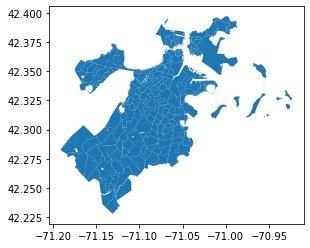

In [7]:
# Boston census tracts
Boston_tracts=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston_tracts_wTGPopAndOtherPopOAP_racial.geojson')
Boston_tracts=gpd.clip(Boston_tracts,Boston,keep_geom_type=True)
Boston_tracts=Boston_tracts[['GEOID10', 'neighbour', 'geometry']]
Boston_tracts['tract_centroid']=Boston_tracts['geometry'].centroid
Boston_tracts.plot()

D:\anaconda3\lib\site-packages\geopandas\tools\clip.py:194: UserWarning: keep_geom_type can not be called on a GeoDataFrame with GeometryCollection.
  "keep_geom_type can not be called on a "
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


<AxesSubplot:>

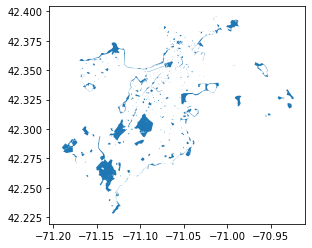

In [8]:
# Parks profile from osm
Boston_parks=gpd.read_file(r'D:\Berkeley\CE263N\Project idea\4weixin\Boston_fulldata_update_remerged.geojson')
Boston_parks=Boston_parks.to_crs('EPSG:4326')
Boston_parks=Boston_parks[['new_id','geometry']]
Boston_parks=gpd.clip(Boston_parks,Boston,keep_geom_type=True) ## clip to boston city area
Boston_parks['park_centroid']=Boston_parks['geometry'].centroid
Boston_parks.plot()

In [9]:
## crop OD Matrix to Boston city area
park_id = [i.split('id_')[-1] for i in np.array(Boston_OD.index)]
tract_id = [i.split('id_')[-1] for i in np.array(Boston_OD.columns)]
Boston_OD.index=park_id
Boston_OD.columns=tract_id

In [10]:
Boston_OD=Boston_OD[Boston_OD.index.isin(Boston_parks.new_id)]
Boston_OD=Boston_OD[Boston_OD.columns[Boston_OD.columns.isin(Boston_tracts.GEOID10.values)]]

In [11]:
Boston_OD.shape

(503, 197)

In [12]:
Boston_OD

,25017342400,25017350103,25017350104,25017351403,25017351404,25017351500,25017373100,25017373500,25017373600,25021400100,...,25025140201,25025140202,25025140300,25025140400,25025180500,25025980101,25025980300,25025981100,25025981300,25025981502
osm_10006,3,1,0,1,0,2,1,1,3,6,...,3,8,3,11,0,1,1,0,0,0
osm_10081,4,1,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
osm_10086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
osm_10163,1,0,0,0,0,0,1,0,0,0,...,1,1,6,3,0,0,0,0,0,0
osm_10164,0,0,0,0,0,0,1,0,0,0,...,1,1,5,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
osm_9781,5,0,7,2,1,0,9,0,9,2,...,0,1,7,3,0,0,0,0,0,0
osm_9844,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
osm_9851,5,0,5,4,0,3,7,11,10,13,...,4,4,16,12,7,0,1,0,0,0
osm_9883,1,0,5,2,0,1,6,4,24,40,...,2,2,4,10,0,1,0,0,1,0


In [13]:
# generating routes between tract centroid and park centroid
odw=pd.DataFrame()
iloc=Boston_OD.iloc()
for i in range(len(Boston_OD)):
    temp=iloc[i]
    temp=temp[temp!=0].reset_index()
    temp['park']=iloc[i].name
    temp=temp.rename(columns={'index':'tract',iloc[i].name:'weights'})
    odw=pd.concat([odw, temp],axis=0)

# Flow DataFrame from census tracts to parks

In [14]:
odw=pd.merge(odw,Boston_parks,how='left',left_on='park',right_on='new_id')

In [15]:
odw=pd.merge(odw,Boston_tracts,how='left',left_on='tract',right_on='GEOID10')

In [16]:
odw=odw[['tract','tract_centroid','park','park_centroid','weights','neighbour']]

In [17]:
odw.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour
0,25017342400,POINT (-71.06810 42.39299),osm_10006,POINT (-71.09818 42.33470),3,White
1,25017350103,POINT (-71.07653 42.38734),osm_10006,POINT (-71.09818 42.33470),1,White
2,25017351403,POINT (-71.07816 42.38507),osm_10006,POINT (-71.09818 42.33470),1,White
3,25017351500,POINT (-71.07939 42.38089),osm_10006,POINT (-71.09818 42.33470),2,White
4,25017373100,POINT (-71.17122 42.35609),osm_10006,POINT (-71.09818 42.33470),1,White


# Census Tract Income

In [18]:
income=pd.read_csv(r'D:\Berkeley\CE263N\Project idea\ACSST5Y2018.S1902_2020-11-04T233028\ACSST5Y2018.S1902_data_with_overlays_2020-11-04T233025.csv',skiprows=1)

In [19]:
income=income[['id','Geographic Area Name', 'Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households']]

In [20]:
income=income.rename(columns={'Estimate!!Mean income (dollars)!!HOUSEHOLD INCOME!!All households':'Mean income'})

In [21]:
id=[i.split('US')[-1] for i in np.array(income.id)]

In [22]:
income.id=id

In [23]:
income

,id,Geographic Area Name,Mean income
0,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193
1,25025000201,"Census Tract 2.01, Suffolk County, Massachusetts",106950
2,25025000202,"Census Tract 2.02, Suffolk County, Massachusetts",103198
3,25025000301,"Census Tract 3.01, Suffolk County, Massachusetts",125179
4,25025000302,"Census Tract 3.02, Suffolk County, Massachusetts",117576
...,...,...,...
199,25025981502,"Census Tract 9815.02, Suffolk County, Massachu...",-
200,25025981600,"Census Tract 9816, Suffolk County, Massachusetts",-
201,25025981700,"Census Tract 9817, Suffolk County, Massachusetts",-
202,25025981800,"Census Tract 9818, Suffolk County, Massachusetts",195892


In [24]:
income['Mean income'].describe()

count     204
unique    195
top         -
freq       10
Name: Mean income, dtype: object

In [25]:
income=income.drop(income[(income['Mean income']=='-')|(income['Mean income']=='N')].index)

In [26]:
income['Mean income']=income['Mean income'].astype('int')

In [27]:
income.sort_values('Mean income')

,id,Geographic Area Name,Mean income
68,25025061101,"Census Tract 611.01, Suffolk County, Massachus...",22833
65,25025060700,"Census Tract 607, Suffolk County, Massachusetts",27459
85,25025080601,"Census Tract 806.01, Suffolk County, Massachus...",29671
86,25025080801,"Census Tract 808.01, Suffolk County, Massachus...",32940
84,25025080500,"Census Tract 805, Suffolk County, Massachusetts",33390
...,...,...,...
39,25025030300,"Census Tract 303, Suffolk County, Massachusetts",210176
30,25025010801,"Census Tract 108.01, Suffolk County, Massachus...",212083
76,25025070700,"Census Tract 707, Suffolk County, Massachusetts",216902
75,25025070600,"Census Tract 706, Suffolk County, Massachusetts",257544


In [28]:
income_Boston=pd.merge(odw,income,how='inner',left_on='tract',right_on='id')

In [29]:
income_Boston

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income
0,25025000100,POINT (-71.13859 42.36148),osm_10006,POINT (-71.09818 42.33470),3,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193
1,25025000100,POINT (-71.13859 42.36148),osm_10163,POINT (-71.12698 42.30325),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193
2,25025000100,POINT (-71.13859 42.36148),osm_10164,POINT (-71.12704 42.30256),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193
3,25025000100,POINT (-71.13859 42.36148),osm_10225,POINT (-71.04911 42.35279),2,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193
4,25025000100,POINT (-71.13859 42.36148),osm_10235,POINT (-71.08711 42.34110),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193
...,...,...,...,...,...,...,...,...,...
50322,25025981100,POINT (-71.10471 42.28790),osm_7680,POINT (-71.09137 42.26693),1,Black,25025981100,"Census Tract 9811, Suffolk County, Massachusetts",51913
50323,25025981100,POINT (-71.10471 42.28790),osm_7941,POINT (-71.05186 42.35868),1,Black,25025981100,"Census Tract 9811, Suffolk County, Massachusetts",51913
50324,25025981100,POINT (-71.10471 42.28790),osm_8733,POINT (-71.12157 42.28211),1,Black,25025981100,"Census Tract 9811, Suffolk County, Massachusetts",51913
50325,25025981100,POINT (-71.10471 42.28790),osm_9075,POINT (-71.08726 42.33063),2,Black,25025981100,"Census Tract 9811, Suffolk County, Massachusetts",51913


# OD matrix to OD routes

In [30]:
# extract route network from flow dataframe

def routeNetwork (G, fdf):
    routes=[]
    temp=fdf.iloc()
    for i in range(len(fdf)):
        origin=ox.get_nearest_node(G,(temp[i].tract_centroid.y,temp[i].tract_centroid.x))
        destination=ox.get_nearest_node(G,(temp[i].park_centroid.y,temp[i].park_centroid.x))
        route=ox.shortest_path(G,origin,destination)
        routes.append(route)
    
    return routes

In [31]:
# networkx routes to geometries 
# code adapted from: https://stackoverflow.com/questions/54641004/save-a-route-and-conserve-its-curvature-with-python-osmnx
from shapely.geometry import MultiLineString
def route_to_geo(G,osmRoutes):
    test_gdf=[]
    edges = ox.graph_to_gdfs(G, nodes=False).set_index(['u', 'v']).sort_index()
    for route in osmRoutes:
        route_pairwise = zip(route[:-1], route[1:])
        lines = [edges.loc[uv, 'geometry'].iloc[0] for uv in route_pairwise]
        multiline=MultiLineString(lines)
        test_gdf.append(multiline)
    return(test_gdf)

In [32]:
def geometryX(geometry):
    return geometry.x
def geometryY(geometry):
    return geometry.y

In [33]:
tc=np.array(income_Boston.tract_centroid)
pc=np.array(income_Boston.park_centroid)

In [34]:
tcy=[geometry.y for geometry in tc]
tcx=[geometry.x for geometry in tc]
pcy=[geometry.y for geometry in pc]
pcx=[geometry.x for geometry in pc]

In [35]:
origins=np.array([tcy,tcx]).T
destinations=np.array([pcy,pcx]).T

In [36]:
nearest_origins=[ox.get_nearest_node(G,origin)for origin in origins]
nearest_destinations=[ox.get_nearest_node(G,dest)for dest in destinations]

In [37]:
ODs=np.array([nearest_origins,nearest_destinations]).T
routes=[ox.shortest_path(G,OD[0],OD[1]) for OD in ODs]

In [38]:
routes_geo=route_to_geo(G,routes)
income_Boston['route_geometry']=gpd.GeoSeries(routes_geo)
income_Boston=gpd.GeoDataFrame(income_Boston,geometry='route_geometry',crs='EPSG:4326')

In [39]:
income_Boston.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income,route_geometry
0,25025000100,POINT (-71.13859 42.36148),osm_10006,POINT (-71.09818 42.33470),3,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389..."
1,25025000100,POINT (-71.13859 42.36148),osm_10163,POINT (-71.12698 42.30325),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389..."
2,25025000100,POINT (-71.13859 42.36148),osm_10164,POINT (-71.12704 42.30256),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389..."
3,25025000100,POINT (-71.13859 42.36148),osm_10225,POINT (-71.04911 42.35279),2,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1388..."
4,25025000100,POINT (-71.13859 42.36148),osm_10235,POINT (-71.08711 42.34110),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389..."


In [47]:
income_Boston['routes']=routes
income_Boston.head()

,tract,tract_centroid,park,park_centroid,weights,neighbour,id,Geographic Area Name,Mean income,route_geometry,routes
0,25025000100,POINT (-71.13859 42.36148),osm_10006,POINT (-71.09818 42.33470),3,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389...","[3518393250, 61339912, 61464455, 61340063, 613..."
1,25025000100,POINT (-71.13859 42.36148),osm_10163,POINT (-71.12698 42.30325),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389...","[3518393250, 61339912, 61464455, 61340063, 613..."
2,25025000100,POINT (-71.13859 42.36148),osm_10164,POINT (-71.12704 42.30256),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389...","[3518393250, 61339912, 61464455, 61340063, 613..."
3,25025000100,POINT (-71.13859 42.36148),osm_10225,POINT (-71.04911 42.35279),2,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1388...","[3518393250, 3518393255, 3518390018, 61339668,..."
4,25025000100,POINT (-71.13859 42.36148),osm_10235,POINT (-71.08711 42.34110),1,White,25025000100,"Census Tract 1, Suffolk County, Massachusetts",100193,"MULTILINESTRING ((-71.13895 42.36136, -71.1389...","[3518393250, 61339912, 61464455, 61340063, 613..."


In [48]:
income_Boston.to_pickle('BostonHomeOthers.pkl')